In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
dir(Station)

['__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_sa_class_manager',
 '_sa_decl_prepare',
 '_sa_raise_deferred_config',
 '_sa_registry',
 'classes',
 'elevation',
 'id',
 'latitude',
 'longitude',
 'metadata',
 'name',
 'prepare',
 'registry',
 'station']

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

### Take a peek at the tables/dataframes in the database

In [16]:
inspector = inspect(engine)
for col in inspector.get_columns('Station'):
    print(col['name'], col['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [49]:
# query_station = session.query(Station).all()
# df = pd.read_sql(query_station, engine)
result = engine.execute('Select * from station')
result_station_df = pd.DataFrame(result)
result_station_df.columns = ['ID', 'Station', "Name", 'Latitude', 'Longitude', 'Elevation']
result_station_df

,ID,Station,Name,Latitude,Longitude,Elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [32]:
inspector = inspect(engine)
for col in inspector.get_columns('measurement'):
    print(col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [50]:
result2 = engine.execute('Select * from measurement')
result_measurement_df = pd.DataFrame(result2)
result_measurement_df.columns = ['ID', 'Station', 'Date', 'prcp', 'tobs']
result_measurement_df

,ID,Station,Date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

2016-08-23 00:00:00


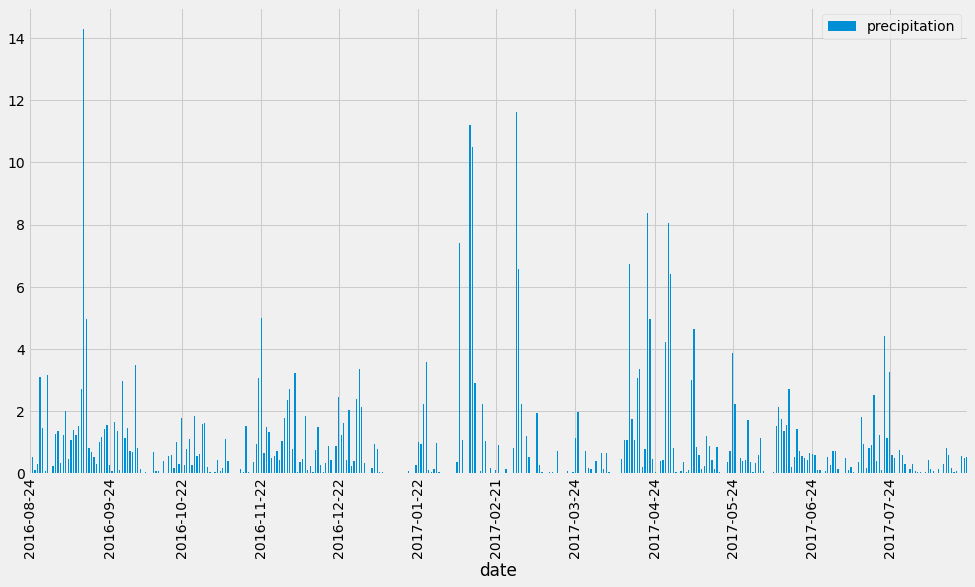

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
diff = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
print(diff)
# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= diff).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_df = pd.DataFrame(date_prcp)
date_prcp_df.columns = ['date', 'precipitation']

# Sort the dataframe by date
date_prcp_df= date_prcp_df.sort_values(by="date")
# combine the data in the same day, groupby and sum:
date_prcp_df= date_prcp_df.groupby('date').sum()

# Use Pandas Plotting with Matplotlib to plot the data

# reduce the frequency on the xticks
import matplotlib.dates as mdates
ax = date_prcp_df.plot(kind='bar', figsize=(15,8))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

In [40]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp_df.describe()

,precipitation
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset

# count from the Station table
total_stations = session.query(Station.station).count()
total_stations


9

In [35]:
# or count from the Measurement table
session.query(Measurement.station).group_by(Measurement.station).count()

9

In [53]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_station_df = pd.DataFrame(session.query(func.count(Measurement.station), Measurement.station).\
                                      group_by(Measurement.station).\
                                      order_by(func.count(Measurement.station).desc()).all())

# the rating of activities is base on how many data is collected from that station
# in another word: how many rows that station was mentioned.

# rename the columns
most_active_station_df.columns = ['activities count', 'station']
most_active_station_df

,activities count,station
0,2772,USC00519281
1,2724,USC00519397
2,2709,USC00513117
3,2669,USC00519523
4,2612,USC00516128
5,2202,USC00514830
6,1979,USC00511918
7,1372,USC00517948
8,511,USC00518838


In [55]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stat_most_active_station_df = pd.DataFrame(session.query(func.count(Measurement.station),
                                              Measurement.station, 
                                              func.min(Measurement.tobs),
                                                func.max(Measurement.tobs),
                                                 func.avg(Measurement.tobs)).group_by(Measurement.station).\
                                order_by(func.count(Measurement.station).desc()).all())
stat_most_active_station_df.columns= ['activities count', 'station', 'min_temp', 'max_temp', 'avg_temp']
stat_most_active_station_df

,activities count,station,min_temp,max_temp,avg_temp
0,2772,USC00519281,54.0,85.0,71.663781
1,2724,USC00519397,56.0,87.0,74.553231
2,2709,USC00513117,59.0,85.0,72.689184
3,2669,USC00519523,56.0,85.0,74.543649
4,2612,USC00516128,58.0,84.0,70.915008
5,2202,USC00514830,58.0,85.0,74.873297
6,1979,USC00511918,53.0,87.0,71.615968
7,1372,USC00517948,58.0,87.0,74.684402
8,511,USC00518838,58.0,83.0,72.724070


### Station USC00519281 is the most actives station with 2772 records
#### I can query and get the same result from the show-cased data frame "result_measurement_df"

In [80]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_temp = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281', 
                                                          Measurement.date >= diff).all()
# type(most_active_temp)
temp_df = pd.DataFrame(most_active_temp)
temp_df.columns = ['temp']
temp_df

,temp
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


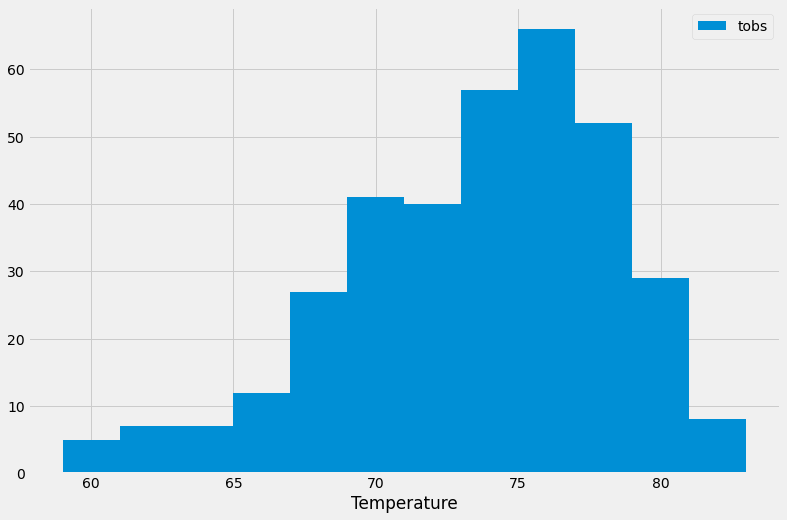

In [92]:
plt.figure(figsize=(12,8))
plt.hist(temp_df.temp, bins=12, label="tobs")
plt.xlabel("Temperature")
plt.legend(loc="upper right")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()